## I. Why look at image and language (bimodal) data? 
Effectiveness on multimodal resource classification tasks aside, it also gets us closer to modeling language (both computationally, and potentially theoretically) with respect to its dependencies. You don't really understand the eye without light, and language without its relationship to referent.

##### Langauge in context? 
Materially, natural language is energy generated by bio-electrical, -chemical, and other physiological means (vocal or manual articulation). Its morphology (a general use of the term) reflects external, social stimuli, with the primary, underlying catalyst of change and variation being the survival of those who employ it. It has significant dependencies on cognition and referent, and its production and consumption are serial in nature.<br>

Thoughts about the above? Email me: jennifer.seale@gmail.com

## II. Neural Nets
"Neural nets are a means of doing machine learning in which... [wetware] learns to perform some task by analyzing training examples. An object recognition system, for instance, might be fed thousands of labeled images of cars, houses, coffee cups, and so on, and it would find visual patterns in the images that consistently correlate with particular labels." - [Explained: Neural networks, MIT News](http://news.mit.edu/2017/explained-neural-networks-deep-learning-0414)

#### A computational graph has: 
    
    Operations: The nodes of the graph. The operations are computations that consume and produce tensors.
    
    Tensors: The edges in the graph. These hold the values that will flow through the graph.
##### What's a tensor?
Put simply, vectors ([.1, .3, .5]) and matrices ([[.1, .3, .5], [.1, .3, .5]]) are kinds of tensors, a bit like poodles and cocker spaniels are kinds of dogs. PyTorch adds some cool features to theirs, like they can remember what operations you performed them...

From Robert Guthrie's [Introduction to Torch's Tensor Library](https://pytorch.org/tutorials/beginner/nlp/pytorch_tutorial.html#sphx-glr-beginner-nlp-pytorch-tutorial-py): 

In [1]:
import torch #this is PyTorch

In [2]:
#Note: Actually accessing your GPU(s) can be slightly tricky 
device = torch.device('cuda:0')
device

device(type='cuda', index=0)

In [3]:
# Creates a vector 
V_data = [1., 2., 3.]
V = torch.tensor(V_data)
V

tensor([1., 2., 3.])

In [4]:
# Creates a matrix
M_data = [[1., 2., 3.], [4., 5., 6]]
M = torch.tensor(M_data)
M

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [5]:
# Create a 3D tensor of size 2x2x2.
T_data = [[[1., 2.], [3., 4.]],
          [[5., 6.], [7., 8.]]]
T = torch.tensor(T_data)
T 

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

If `requires_grad=True`, the Tensor object keeps track of how it was created.

In [6]:
x = torch.tensor([1., 2., 3], requires_grad=True)
x

tensor([1., 2., 3.], requires_grad=True)

In [7]:
x.grad

In [8]:
y = torch.tensor([4., 5., 6], requires_grad=True)
y

tensor([4., 5., 6.], requires_grad=True)

In [9]:
z = x + y
z

tensor([5., 7., 9.], grad_fn=<AddBackward0>)

In [10]:
z.grad_fn

In [11]:
s = z.sum()

In [12]:
s.backward()

In [13]:
x.grad

tensor([1., 1., 1.])

The tensors know what created them. z knows that it wasn’t read in from a file, it wasn’t the result of a multiplication or exponential or whatever. And if you keep following z.grad_fn, you will find yourself at x and y.

In [16]:
? torch.tensor

#### Developing and training a neural network:

    1. Define a neural network that has some learnable parameters (or weights)
    
    2. Process input through the network
    
    3. Compute the loss (how far the output is from being correct)
    
    4. Propagate gradients back into the network’s parameters (backpropagate the error)
           - Call loss.backward() and the whole graph is differentiated w.r.t. the loss.
    
    5. Update the weights of the network; a simple update rule: weight = weight - learning_rate * gradient
    
https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

In [17]:
import IPython
from IPython.display import YouTubeVideo

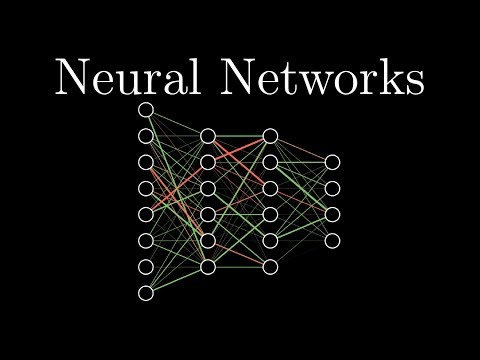

In [18]:
display(YouTubeVideo("aircAruvnKk"))

## III. Bimodal Neural Nets

**Mode 1: Text**<br>
Build a neural net for text input: perhaps use a pretrained fine-tuned (Bi-)LSTM language model, further trained for text classification.

What does a language model do? <br>
Predicts the next word in a sentence

What does a text classifier do? <br>
Predicts the topic(s) of a text

What's a pretrained model? Why use one?<br>
A pretrained model is a model that someone has already differentiated and made available to the community, probably using tons of data, and having won a major contest or proven out better results on certain tasks. 

What's finetuning a model?<br> 
Fine tuning is a process to take a network model that has already been trained for a given task, and make it perform a second similar task. - [Finetuning](wiki.fast.ai/index.php/Fine_tuning)

What's an LSTM?<br> 
A [long short-term memory](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) (LSTM) neural net is type a [Recurrent Neural Net](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) (RNN) that helps us to solve the time series problem in language—helping us to predict, say, the last word in this text: “I grew up in France… I speak fluent French.”

What's a Bi-LSTM?<br> 
*Bi* stands for bi-directional. We train the model on the language forwards and backwards to improve performance.

**Mode 2: Images**<br>
Build a neural net for image input: pre-trained CNN fine-tuned for our labels

What's a CNN?<br>
*CNN* stands for convolutional neural net. It's commonly used in computer vision.

### Combine!

Gated Multimodal Unit - _it learns which features of the text and images are most important for classification_

![gmu](images/gmu.png)

[Gated Multimodal Units for Information Fusion](http://anotherdatum.com/gmu.html)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
z = np.linspace(-5, 5, 200)

In [21]:
z

array([-5.        , -4.94974874, -4.89949749, -4.84924623, -4.79899497,
       -4.74874372, -4.69849246, -4.64824121, -4.59798995, -4.54773869,
       -4.49748744, -4.44723618, -4.39698492, -4.34673367, -4.29648241,
       -4.24623116, -4.1959799 , -4.14572864, -4.09547739, -4.04522613,
       -3.99497487, -3.94472362, -3.89447236, -3.84422111, -3.79396985,
       -3.74371859, -3.69346734, -3.64321608, -3.59296482, -3.54271357,
       -3.49246231, -3.44221106, -3.3919598 , -3.34170854, -3.29145729,
       -3.24120603, -3.19095477, -3.14070352, -3.09045226, -3.04020101,
       -2.98994975, -2.93969849, -2.88944724, -2.83919598, -2.78894472,
       -2.73869347, -2.68844221, -2.63819095, -2.5879397 , -2.53768844,
       -2.48743719, -2.43718593, -2.38693467, -2.33668342, -2.28643216,
       -2.2361809 , -2.18592965, -2.13567839, -2.08542714, -2.03517588,
       -1.98492462, -1.93467337, -1.88442211, -1.83417085, -1.7839196 ,
       -1.73366834, -1.68341709, -1.63316583, -1.58291457, -1.53

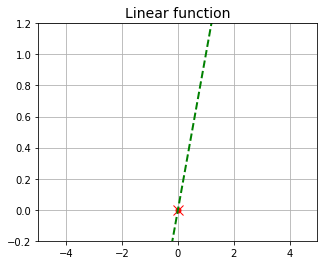

In [22]:
plt.figure(figsize=(11,4))
plt.subplot(122)
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, z, "g--", linewidth=2, label="Linear")
plt.grid(True)
plt.title("Linear function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [23]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)


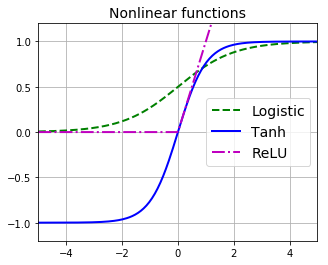

In [24]:
plt.figure(figsize=(11,4))
plt.subplot(122)
plt.plot(z, logit(z), "g--", linewidth=2, label="Logistic")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Nonlinear functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])
plt.show()

https://en.wikipedia.org/wiki/Tensor_product

## IV. Dev Ops

### GPU or CPU?

GPU. It's faster. This means, well, probably something other than your laptop. Insert: AWS, or some other cloud computing solution.

For more on getting compute:

In [25]:
IPython.display.IFrame('https://course.fast.ai/lessons/lesson1.html', width=1000, height=350)

### Cloud computing with AWS

Tips for doing cloud computing well: 
1. Get to know your shell / terminal. 
2. Learn a text (code) editor like emacs or Vim to keep you as close to the terminal as possible. (Issue: `vimtutor` in your terminal for a great Vim tutorial.) 

![vimtutor](images/vimtutor.png)
*Why the above?* You're going to get things done more efficiently; Vim is basically ubiquitous in Unix systems, GitHub has your do commit message changes in Vim...

#### AWS is... complicated. What do I use? 
Use a persistent spot request (it's less expensive); Get a p2.xlarge EC2 instance with a Deep Learning AMI. (You may need something larger, but this should work to get you started.)
A pretty ok tutorial: [Persistent AWS Spot Instance for Deep learning using GUI](https://medium.com/@vijendra1125/persistent-aws-spot-instance-for-deep-learning-using-gui-1fa218d6946b)

![$$$](images/cost.png)

#### SSH (authenticated access)
`ssh -i ~/.ssh/your-key.pem ubuntu@10.100.17.221`

#### Port Forwarding
Want to view your jupyter notebook on your local machine while working remotely? <br>
Issue:<br>
`jupyter notebook --no-browser --port=8888`<br>
In a new terminal tab, issue:<br> 
`ssh -i ~/.ssh/your-key.pem -L 8000:localhost:8888 ubuntu@10.100.17.221`<br>
8000 being the port you will use locally and 8888 being your remote port.

#### SCP (secure copy paste)
How to move things from your machine to your remote instance. After your key, put the path you're pasting from, then the path you're pasting to. FROM TO - always in that order.

`scp -i ~/.ssh/your-key.pem ~/downloads/bwd_wt103.h5 ubuntu@10.100.89.160:/home/ubuntu/...`

#### TMUX!
Start a tmux session and your process can run as long as your spot instance—even when you've logged off, shut your laptop, turned off your machine... <br>
`tmux new -s mysession`<br>
`tmux attach -t mysession`<br>
https://tmuxcheatsheet.com/

#### Virtual Environments

ALWAYS create a virtual environment (or use one of the AWS AMI's) for your work. 

ALWAYS install libraries specific to your project's needs into your project's environment. 

Use [Conda](https://conda.io/docs/index.html) to manage your environments and install packages (when possible)—it handles dependencies for you. 

`conda create --name myenv`<br>
`conda activate myenv`<br>
`conda install superamazingpackage`<br>
`conda deactivate myenv`<br>


_Need to run your code in your environment in a jupyter notebook, but it's not showing up as a Kernel? Activate your  environment and issue:_ 

`python -m ipykernel install --user --name myenv --display-name "Python (myenv)"`

## V. Transfer learning, ULMFiT

Inductive transfer learning has greatly impacted computer vision, but existing approaches in NLP still require task-specific modifications and training from scratch. We propose Universal Language Model Fine-tuning (ULMFiT), an effective transfer learning method that can be applied to any task in NLP, and introduce techniques that are key for fine-tuning a language model. **Our method significantly outperforms the state-of-the-art on six text classification tasks, reducing the error by 18-24% on the majority of datasets.** Furthermore, with only 100 labeled examples, it matches the performance of training from scratch on 100x more data. We open-source our pretrained models and code. - [
Universal Language Model Fine-tuning for Text Classification](https://arxiv.org/abs/1801.06146)

#### Getting ULMFiT language model trained on Wikipedia in English

Create a directory `wt103`. In `wt103`, create a `models` and a `tmp` folder. Save the model files in the `models` folder and `itos_wt103.pkl`, the word-to-token mapping, to the `tmp` folder.
http://files.fast.ai/models/wt103/

#### Data

Generate data to finetune the model to classify movie genres: 

Make train.csv and val.csv files to be in DIR_PATH. Each file should be in CSV format. If the data is labeled, the first column should consist of the label as an integer. The remaining columns should consist of text or features, which will be concatenated to form each example. https://github.com/fastai/fastai/tree/master/courses/dl2/imdb_scripts    

In [26]:
import pandas as pd
df = pd.read_csv("data/train.csv", header=None)
df.head()

,0,1
0,1,"Howling II: … Your Sister is a Werewolf, A you..."
1,1,"The Blancheville Monster, The beautiful young ..."
2,1,"Hell Fest, A masked serial killer turns a horr..."
3,2,"Aquaman, Arthur Curry learns that he is the he..."
4,2,"Titans, A team of young superheroes led by Nig..."


Split your data into ~80/20 train/validate.

Fine tune, train your classifier, evaluate, and predict:

https://github.com/fastai/fastai/blob/master/courses/dl2/imdb_scripts/README.md

Keep going... 